In [1]:
!pip install dmol-book

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 3.2 MB 7.3 MB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
     |████████████████████████████████| 4.7 MB 35.9 MB/s 
     |████████████████████████████████| 352 kB 44.3 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 128 kB 63.2 MB/s 
     |████████████████████████████████| 3.5 MB 38.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 250 kB 45.8 MB/s 
     |████████████████████████████████| 29.5 MB 1.2 MB/s 
     |████████████████████████████████| 117 kB 76.6 MB/s 
     |████████████████████████████████| 145 kB 61.7 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax
import dmol
import seaborn as sns
import rdkit, rdkit.Chem, rdkit.Chem.Draw
import tensorflow as tf
import urllib


from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv("gdrive/MyDrive/dataset/CSD_EES_DB.csv")
dataset.head()

,ID,doi,formula,NAts,SMILES,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3)
0,AACFAZ10,10.1107/S0108270183005156,C26 H22 Cl2 N2 O6,36.0,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,-7.548438,-1.912144,3.1382,0.0027,3.8297,1.1448,4.5310,0.0000,2.2270,2.8977,3.0885
1,ABACIR,10.1107/S160053681103861X,C17 H21 N3 O4 S2,26.0,O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1,-7.675787,-1.725202,3.6720,0.0982,3.7456,0.0888,4.1316,0.0016,2.3255,2.8794,3.2735
2,ABADEO,10.1107/S1600536811039158,C30 H28 N6 O2,38.0,CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C...,-6.603659,-0.762191,3.9027,0.7900,4.0170,0.2765,4.1450,0.0455,2.6892,3.0039,3.5964
3,ABADUE,10.1107/S1600536811039110,C17 H17 N1 O4,22.0,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1,-6.790057,-0.969814,3.3127,0.0001,3.9203,0.7088,4.6824,0.0265,2.5848,2.9294,3.9060
4,ABAGAN,10.1107/S1600536811038177,C26 H17 O1 P1,28.0,O=P1(c2ccccc2)c2ccc3ccccc3c2c2c3ccccc3ccc12,-7.067613,-1.419890,3.6197,0.1814,4.2742,0.0073,4.4154,0.0007,2.5192,3.2095,3.8388


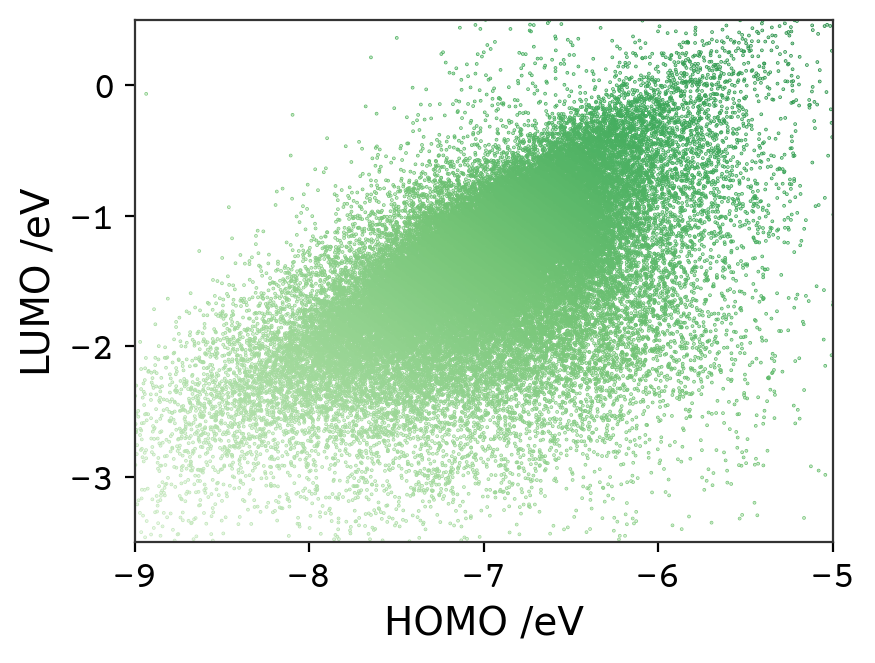

In [ ]:
font = {'fontname':'DejaVu Sans'}
plt.scatter(dataset.HOMO.values, dataset.LUMO.values, s=0.1, c=dataset.HOMO.values+dataset.LUMO.values, cmap="Greens")
plt.xlabel("HOMO /eV", **font)
plt.ylabel("LUMO /eV", **font)
plt.axes().set_facecolor("white")
plt.xlim(-9, -5)
plt.ylim(-3.5, 0.5)

plt.show()

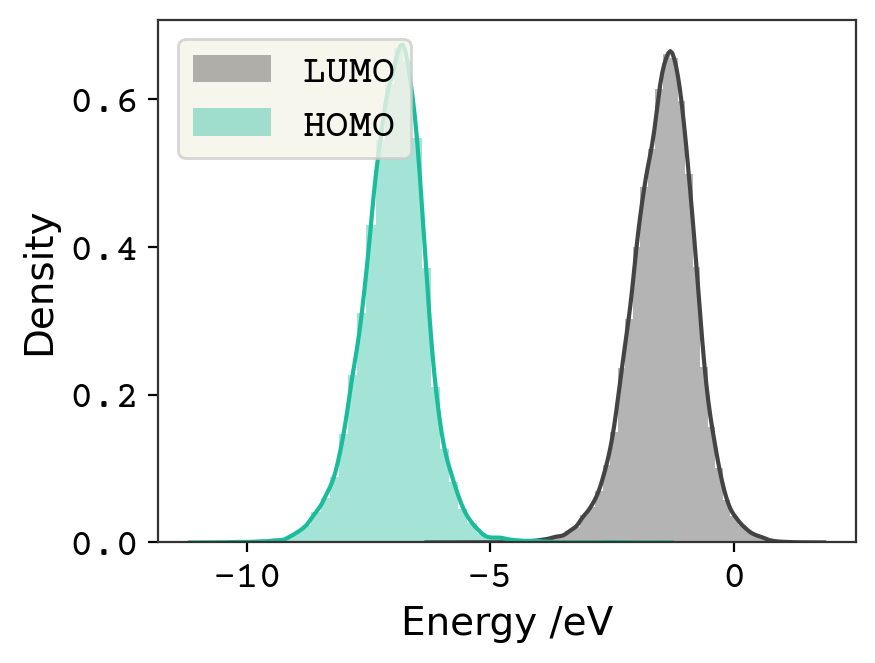

In [ ]:
sns.distplot(dataset.LUMO.values, label="LUMO")
sns.distplot(dataset.HOMO.values, label="HOMO")
plt.legend(loc = "upper left")
plt.axes().set_facecolor("white")
plt.xlabel("Energy /eV", **font)
plt.ylabel("Density", **font)
plt.show()

Highest and Lowest HOMO and LUMO Values


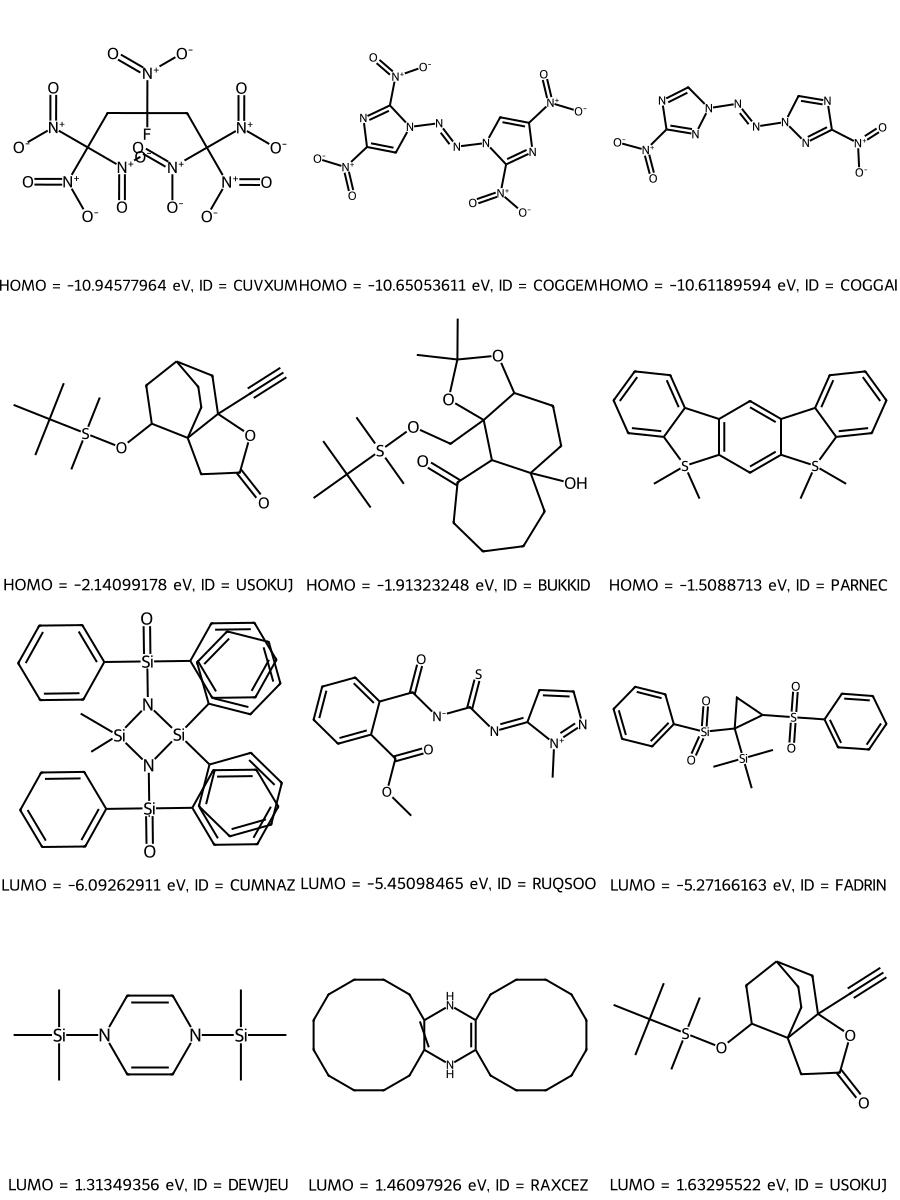

In [ ]:
sortHOMO = dataset.sort_values("HOMO")
sortLUMO = dataset.sort_values("LUMO")
extremeHOMO = pd.concat([sortHOMO[:3], sortHOMO[-3:]])
extremeLUMO = pd.concat([sortLUMO[:3], sortLUMO[-3:]])

#legend = [f"HOMO = {i} "  for i in extremeHOMO.HOMO]+[f"LUMO = {i} "  for i in extremeLUMO.LUMO]
legend = [f"HOMO = {extremeHOMO.HOMO.values[i]} eV, ID = {extremeHOMO.ID.values[i]} "  for i in range(len(extremeHOMO))]+[f"LUMO = {extremeLUMO.LUMO.values[i]} eV, ID = {extremeLUMO.ID.values[i]} "  for i in range(len(extremeLUMO))]

drawHOMO = [rdkit.Chem.MolFromSmiles(i) for i in extremeHOMO.SMILES]
drawLUMO = [rdkit.Chem.MolFromSmiles(i) for i in extremeLUMO.SMILES]
draw = [rdkit.Chem.MolFromSmiles(i) for i in extremeHOMO.SMILES] + [rdkit.Chem.MolFromSmiles(i) for i in extremeLUMO.SMILES]

print("Highest and Lowest HOMO and LUMO Values")
rdkit.Chem.Draw.MolsToGridImage(draw, legends=legend, subImgSize=(300, 300))
